# **Catatan**

- Kode program 1 adalah kalian tinggal running kode ini agar dapat melihat training dengan data asli tanpa dibersihkan, kemudian dievaluasi hasilnya dan dicatat. (running sendiri ya)
- hasil training dengan data asli (classification non-tuning) dibandingkan dengan hasil training data asli menggunakan hyperparameter tuning
- metric evaluasinya harus ada accuracy, precision, recall, dan f1-score

Kode ini untuk Topik ini:
- Ransomware Detection Using Transformer
Topik Riset 1:
"Studi Transformer-Based Sequence Modelling untuk Deteksi Ransomware Melalui Analisis Trafik Jaringan yang Mengenkripsi Secara Tiba-tiba"
Deskripsi:
Model Transformer dilatih untuk mendeteksi pola enkripsi yang tiba-tiba dalam trafik jaringan. Dengan memanfaatkan arsitektur Transformer, model dapat mengenali urutan paket data yang menunjukkan aktivitas enkripsi ransomware secara dini sebelum terjadi dampak serius.
Novelty: Tinggi. Penggunaan Transformer untuk mendeteksi pola enkripsi ransomware yang tiba-tiba dalam trafik jaringan belum banyak dieksplorasi secara spesifik. Transformer memiliki kemampuan menangani urutan data panjang dan deteksi pola, sehingga bisa menghadirkan pendekatan baru dalam prediksi serangan ransomware.
Dataset: UNSW-NB15 Dataset
Dataset ini mencakup trafik yang mencakup berbagai serangan jaringan, termasuk backdoor, yang relevan untuk deteksi ransomware. Model Transformer dapat dilatih menggunakan pola trafik berbahaya dari dataset ini untuk mendeteksi aktivitas enkripsi ransomware.
Dataset: UNSW-NB15 Dataset

ganti dataset yang ini ya...

# **Tolong di running sendiri ya, kalau ada error tanyakan dahalu melalui chatgpt ya**

# **Importing Modules and Libraries**

In [71]:
# importing required libraries
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import pickle
from os import path

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


# **Importing Datasets**

Mount Google Drive:

Digunakan untuk mengakses file yang disimpan di Google Drive.

In [72]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
!ls


Mounted at /content/gdrive
shell-init: error retrieving current directory: getcwd: cannot access parent directories: Transport endpoint is not connected
ls: cannot open directory '.': Transport endpoint is not connected


Mengubah direktori kerja:

Ini digunakan untuk berpindah ke folder tempat dataset Anda berada.

In [73]:
import os
os.chdir("/content/gdrive/MyDrive/Android Ransomware Detection")
!ls


Android_Ransomeware.csv  model_best_fold_2.pt  model_best_fold_4.pt
model_best_fold_1.pt	 model_best_fold_3.pt  model_best_fold_5.pt


Memuat dataset:

Dataset UNSW_NB15.csv dimuat ke dalam variabel data.

In [74]:
data = pd.read_csv('/content/gdrive/MyDrive/Android Ransomware Detection/Android_Ransomeware.csv')


Menampilkan informasi awal tentang data:

Menampilkan 5 baris pertama dari dataset dan informasi tentang tipe data, jumlah entri, dan kolom yang ada di dalam dataset.

In [75]:
data.head(n=5)


,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,172.217.2.174-10.42.0.211-443-51023-6,10.42.0.211,51023,172.217.2.174,443,6,16/06/2017 03:55:47,151054,6,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
1,1,172.217.2.174-10.42.0.211-443-51023-6,10.42.0.211,51023,172.217.2.174,443,6,16/06/2017 03:55:47,349,2,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
2,2,172.217.12.174-10.42.0.211-443-34259-6,10.42.0.211,34259,172.217.12.174,443,6,16/06/2017 03:55:52,119,2,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
3,3,172.217.10.74-10.42.0.211-443-55509-6,10.42.0.211,55509,172.217.10.74,443,6,16/06/2017 03:55:53,37055,1,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
4,4,172.217.2.174-10.42.0.211-443-44852-6,10.42.0.211,44852,172.217.2.174,443,6,16/06/2017 03:55:58,178727,6,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign


In [76]:
print(data['Label'].value_counts())


Label
SVpeng         54161
PornDroid      46082
Koler          44555
Benign         43091
RansomBO       39859
Charger        39551
Simplocker     36340
WannaLocker    32701
Jisut          25672
Lockerpin      25307
Pletor          4715
Name: count, dtype: int64


In [77]:
# Hitung distribusi label
label_counts = data['Label'].value_counts()
print(label_counts)


Label
SVpeng         54161
PornDroid      46082
Koler          44555
Benign         43091
RansomBO       39859
Charger        39551
Simplocker     36340
WannaLocker    32701
Jisut          25672
Lockerpin      25307
Pletor          4715
Name: count, dtype: int64


In [78]:
data.shape


(392034, 86)

In [79]:
data= data.sample(frac=0.1).reset_index(drop=True)

In [80]:
data

,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,985,211.144.37.229-10.42.0.211-80-51835-6,10.42.0.211,51835,211.144.37.229,80,6,30/08/2017 08:53:06,19785497,3,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Charger
1,958,192.229.173.136-10.42.0.42-443-42893-6,10.42.0.42,42893,192.229.173.136,443,6,28/08/2017 10:06:31,59497707,7,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,SVpeng
2,446,10.42.0.211-72.51.26.219-46250-80-6,10.42.0.211,46250,72.51.26.219,80,6,22/08/2017 09:12:35,1263,7,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Jisut
3,1628,162.208.22.39-10.42.0.211-443-49611-6,10.42.0.211,49611,162.208.22.39,443,6,30/08/2017 09:11:29,7575199,2,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Charger
4,292,10.42.0.211-31.13.71.52-32939-443-6,10.42.0.211,32939,31.13.71.52,443,6,17/06/2017 02:09:02,226331,19,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39198,1982,10.42.0.211-10.42.0.1-1406-53-17,10.42.0.211,1406,10.42.0.1,53,17,21/08/2017 03:12:55,254453,1,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Jisut
39199,2832,10.42.0.1-10.42.0.42-53-51594-17,10.42.0.42,51594,10.42.0.1,53,17,28/08/2017 10:19:47,31189,1,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,SVpeng
39200,3520,10.42.0.211-103.235.46.211-57325-443-6,10.42.0.211,57325,103.235.46.211,443,6,23/08/2017 04:23:28,1322114,2,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Koler
39201,2573,10.42.0.151-10.42.0.1-11911-53-17,10.42.0.151,11911,10.42.0.1,53,17,29/08/2017 04:10:44,77383,1,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,RansomBO


Ini adalah proses atau tahapan persiapan data yang baik sebelum dilanjutkan ke tahap analisis atau pemodelan.

# **Data Visualization**

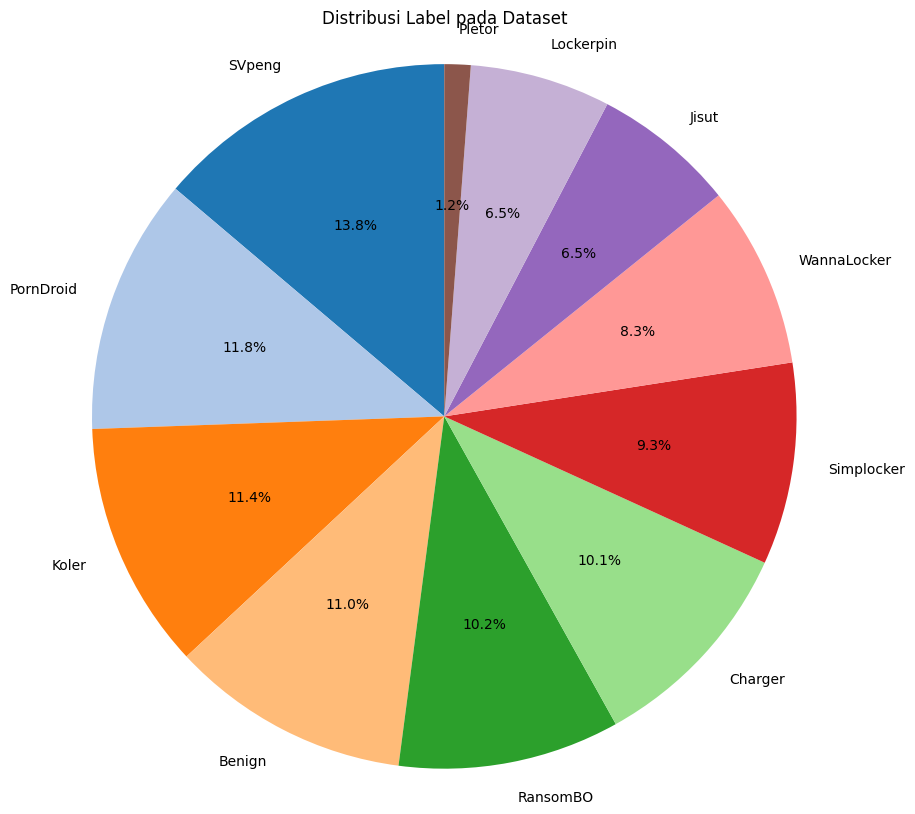

In [81]:
import matplotlib.pyplot as plt

# Plot pie chart
plt.figure(figsize=(10, 10))
plt.pie(
    label_counts,
    labels=label_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=plt.cm.tab20.colors  # Menggunakan palet warna yang bervariasi
)
plt.title('Distribusi Label pada Dataset')
plt.axis('equal')  # Membuat pie chart berbentuk lingkaran
plt.show()


In [82]:
# Melihat nilai unik dari kolom Label
unique_labels = data['Label'].unique()
print("Nilai Unik dalam Label:", unique_labels)


Nilai Unik dalam Label: ['Charger' 'SVpeng' 'Jisut' 'Benign' 'RansomBO' 'PornDroid' 'Koler'
 'Simplocker' 'WannaLocker' 'Lockerpin' 'Pletor']


In [83]:
# Menghitung jumlah setiap kelas dalam Label
label_counts = data['Label'].value_counts()
print("Distribusi Kelas:\n", label_counts)


Distribusi Kelas:
 Label
SVpeng         5317
PornDroid      4617
Koler          4508
Benign         4290
Charger        4019
RansomBO       3913
Simplocker     3673
WannaLocker    3314
Lockerpin      2566
Jisut          2523
Pletor          463
Name: count, dtype: int64


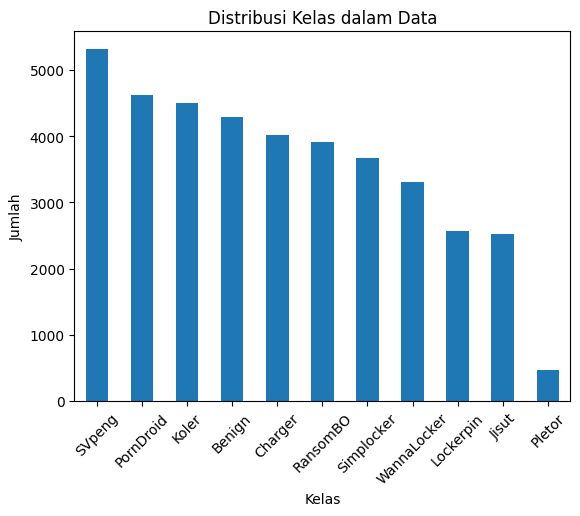

In [84]:
import matplotlib.pyplot as plt

# Membuat diagram batang untuk distribusi kelas
label_counts.plot(kind='bar')
plt.title('Distribusi Kelas dalam Data')
plt.xlabel('Kelas')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.show()


# **Label Encoding**

In [85]:
# Misalkan Anda sudah memuat data ke dalam DataFrame bernama `data`
# Menghapus spasi dari nama kolom
data.columns = data.columns.str.strip()

# Cek kolom untuk memastikan tidak ada spasi
print(data.columns)

Index(['Unnamed: 0', 'Flow ID', 'Source IP', 'Source Port', 'Destination IP',
       'Destination Port', 'Protocol', 'Timestamp', 'Flow Duration',
       'Total Fwd Packets', 'Total Backward Packets',
       'Total Length of Fwd Packets', 'Total Length of Bwd Packets',
       'Fwd Packet Length Max', 'Fwd Packet Length Min',
       'Fwd Packet Length Mean', 'Fwd Packet Length Std',
       'Bwd Packet Length Max', 'Bwd Packet Length Min',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
       'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Le

In [86]:
import pandas as pd

# Misalkan Anda sudah memuat data ke dalam DataFrame bernama `data`
# Siapkan fitur (X) dan target (y)
X = data.drop(['Label', 'Flow ID', 'Source IP', 'Destination IP'], axis=1)  # Menghapus kolom yang tidak diperlukan
y = data['Label']  # Menggunakan kolom 'Label' secara langsung

# Tampilkan beberapa informasi untuk memastikan semuanya benar
print("Fitur (X):")
print(X.head())
print("\nLabel (y):")
print(y.value_counts())  # Menampilkan distribusi label


Fitur (X):
   Unnamed: 0  Source Port  Destination Port  Protocol            Timestamp  \
0         985        51835                80         6  30/08/2017 08:53:06   
1         958        42893               443         6  28/08/2017 10:06:31   
2         446        46250                80         6  22/08/2017 09:12:35   
3        1628        49611               443         6  30/08/2017 09:11:29   
4         292        32939               443         6  17/06/2017 02:09:02   

   Flow Duration  Total Fwd Packets  Total Backward Packets  \
0       19785497                  3                       1   
1       59497707                  7                       7   
2           1263                  7                       0   
3        7575199                  2                       0   
4         226331                 19                      22   

   Total Length of Fwd Packets  Total Length of Bwd Packets  ...  \
0                          0.0                          0.0  ...   

In [87]:
# Assuming 'data' is your original DataFrame
# and you want to create 'bin_data' from it


# 1. Import necessary libraries (if not already imported)
import pandas as pd
from sklearn.preprocessing import LabelBinarizer, LabelEncoder

# Label Encoding
bin_label = pd.DataFrame(data["Label"].map(lambda x:'normal' if x=="Benign" else 'abnormal'))

bin_data = data.copy()
bin_data["Label"] = bin_label

le1 = preprocessing.LabelEncoder()
enc_label = bin_label.apply(le1.fit_transform)
bin_data["Label"] = enc_label

# # 2. Create bin_data
# # Assuming 'Label' is the column you want to binarize
# le1 = LabelBinarizer()  # Create a LabelBinarizer object
# bin_data = data.copy()  # Create a copy of your original DataFrame
# bin_data['Label'] = le1.fit_transform(data['Label'])  # Binarize the 'Label' column

# # Now you can proceed with the rest of your code
# X_bin = bin_data.drop(columns=['Label'], axis=1)
# y_bin = bin_data['Label']

# ... (rest of your code)

In [88]:
le1.classes_

array(['abnormal', 'normal'], dtype=object)

# **DATA SPLITTING**

In [89]:
# 1. Mengimpor Modul yang Diperlukan
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from os import path
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score


In [90]:
X_bin = bin_data.drop(columns=['Label'],axis=1)
y_bin = bin_data['Label']

X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(X_bin, y_bin, test_size=0.2, random_state=50)


# **LIBRARY TRANSFORMER**

Instalasi Paket yang Diperlukan

Instalasi paket: Menginstal berbagai paket yang diperlukan untuk pembelajaran mesin dan pemrosesan data.

In [91]:
!pip install transformers tensorflow scikit-learn matplotlib pandas


# **1. TRANSFORMER "ENCODER"**

# **CLASSIFICATION Non-Tuning**

ini dirunning sendiri ya

In [ ]:
print([col for col in bin_data.columns])


['Unnamed: 0', 'Flow ID', 'Source IP', 'Source Port', 'Destination IP', 'Destination Port', 'Protocol', 'Timestamp', 'Flow Duration', 'Total Fwd Packets', 'Total Backward Packets', 'Total Length of Fwd Packets', 'Total Length of Bwd Packets', 'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s', 'Min Packet Length', 'Max Packet Length', 'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count', 'SYN Flag Count', 'RST Flag

Fold 1
Accuracy for fold 1: 88.92%
F1 Score for fold 1: 0.8370
              precision    recall  f1-score   support

      Benign       0.89      1.00      0.94      6972
     Charger       0.00      0.00      0.00       869

    accuracy                           0.89      7841
   macro avg       0.44      0.50      0.47      7841
weighted avg       0.79      0.89      0.84      7841



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


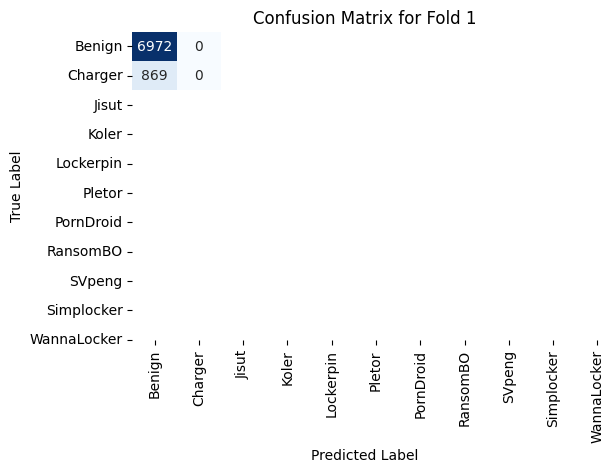

Fold 2
Accuracy for fold 2: 89.12%
F1 Score for fold 2: 0.8399
              precision    recall  f1-score   support

      Benign       0.89      1.00      0.94      6988
     Charger       0.00      0.00      0.00       853

    accuracy                           0.89      7841
   macro avg       0.45      0.50      0.47      7841
weighted avg       0.79      0.89      0.84      7841



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


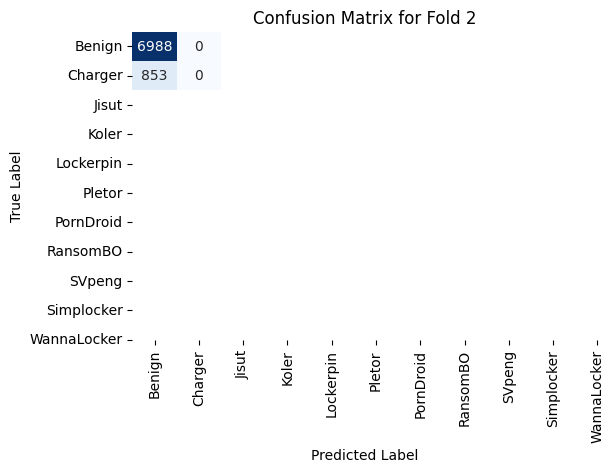

Fold 3


KeyboardInterrupt: 

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score
from sklearn.preprocessing import LabelEncoder
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Preprocessing: Label Encoding
class_names = le1.classes_  # Save the original class names

# Cek apakah ada nilai hilang dan ganti dengan nilai yang sesuai
bin_data.fillna(0, inplace=True)  # Mengisi nilai hilang dengan 0

# 2. Define Transformer Model
class TransformerModel(nn.Module):
    def __init__(self, input_dim, num_classes, d_model=64, nhead=2, num_layers=2):
        super(TransformerModel, self).__init__()
        self.embedding = nn.Linear(input_dim, d_model)  # Embedding layer
        self.transformer_encoder = nn.TransformerEncoder(
            nn.TransformerEncoderLayer(d_model=d_model, nhead=nhead, batch_first=True),
            num_layers=num_layers
        )
        self.fc = nn.Linear(d_model, num_classes)  # Output layer

    def forward(self, x):
        x = self.embedding(x)  # Embed the input features
        x = x.unsqueeze(1)  # Add sequence dimension (batch_size, seq_length, feature_dim)
        x = self.transformer_encoder(x)  # Pass through the transformer encoder
        x = x.mean(dim=1)  # Average pooling
        return self.fc(x)  # Final output

# 3. KFold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=50)
all_accuracy, all_f1_scores = [], []
conf_matrix_list = []
average_train_losses = []  # List to store average train losses for plotting
average_val_accuracies = []  # List to store validation accuracies for plotting

for fold, (train_index, val_index) in enumerate(kf.split(bin_data)):
    print(f'Fold {fold + 1}')

    # Split data using .iloc to select rows by index
    X_train, X_val = bin_data.drop(columns=['Label']).iloc[train_index], bin_data.drop(columns=['Label']).iloc[val_index]
    y_train, y_val = bin_data['Label'].iloc[train_index], bin_data['Label'].iloc[val_index]

    # Convert to PyTorch tensors (hanya ambil kolom numerik)
    X_train_tensor = torch.FloatTensor(X_train.select_dtypes(include=np.number).values)
    y_train_tensor = torch.LongTensor(y_train.values)
    X_val_tensor = torch.FloatTensor(X_val.select_dtypes(include=np.number).values)
    y_val_tensor = torch.LongTensor(y_val.values)

    # Create DataLoader
    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

    # Initialize the model
    model = TransformerModel(input_dim=X_train_tensor.shape[1], num_classes=len(class_names))
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

    # Early stopping setup
    best_accuracy = 0
    patience, trigger_times = 5, 0

    # Train the model
    num_epochs = 5  # Meningkatkan jumlah epoch
    train_losses = []  # List untuk menyimpan loss per epoch
    val_accuracies = []  # List untuk menyimpan akurasi per epoch

    for epoch in range(num_epochs):
        model.train()
        epoch_loss = 0
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()

        avg_loss = epoch_loss / len(train_loader)
        train_losses.append(avg_loss)

        # Validate the model
        model.eval()
        with torch.no_grad():
            y_pred_probs = model(X_val_tensor)
            _, y_pred = torch.max(y_pred_probs, 1)

        accuracy = accuracy_score(y_val, y_pred.numpy())
        val_accuracies.append(accuracy)

        # Save the best model
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            torch.save(model.state_dict(), f'model_best_fold_{fold + 1}.pt')
            trigger_times = 0
        else:
            trigger_times += 1

        if trigger_times >= patience:
            print(f'Early stopping triggered at epoch {epoch + 1}')
            break

    # Metrics calculation
    conf_matrix = confusion_matrix(y_val, y_pred.numpy())
    conf_matrix_list.append(conf_matrix)
    all_accuracy.append(accuracy)

    f1 = f1_score(y_val, y_pred.numpy(), average='weighted')
    all_f1_scores.append(f1)

    # Print results for the current fold
    print(f'Accuracy for fold {fold + 1}: {accuracy * 100:.2f}%')
    print(f'F1 Score for fold {fold + 1}: {f1:.4f}')

    # Get unique labels present in y_val and y_pred
    unique_labels = np.unique(np.concatenate((y_val, y_pred.numpy())))

    # Filter target names based on unique labels
    target_names_filtered = [class_names[i] for i in unique_labels]

    # Use filtered target names in classification_report
    cls_report = classification_report(y_val, y_pred.numpy(), target_names=target_names_filtered, labels=unique_labels)
    print(cls_report)

    # Store average loss and accuracy for plotting
    average_train_losses.append(train_losses)
    average_val_accuracies.append(val_accuracies)

    # Plot confusion matrix for the current fold
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='.0f', cmap='Blues', cbar=False,
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix for Fold {fold + 1}')
    plt.show()

# 4. Average Metrics Across All Folds
print(f'Average Accuracy: {np.mean(all_accuracy) * 100:.2f}%')
print(f'Average F1 Score: {np.mean(all_f1_scores):.4f}')

# 5. Plot the Average Confusion Matrix
average_conf_matrix = np.mean(conf_matrix_list, axis=0)

plt.figure(figsize=(8, 6))
sns.heatmap(average_conf_matrix, annot=True, fmt='.0f', cmap='Blues', cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Average Confusion Matrix Across Folds')
plt.show()

# 6. Analysis of Results
print("Hasil Deteksi Pola Enkripsi Ransomware:")
for i, (acc, f1) in enumerate(zip(all_accuracy, all_f1_scores)):
    print(f'Fold {i + 1}: Akurasi = {acc * 100:.2f}%, F1 Score = {f1:.4f}')

# 7. Plot Loss and Accuracy for Each Fold
for fold in range(len(average_train_losses)):
    plt.figure(figsize=(12, 5))

    # Grafik Loss
    plt.subplot(1, 2, 1)
    plt.plot(average_train_losses[fold], label='Training Loss', marker='o')
    plt.title(f'Training Loss for Fold {fold + 1}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid()

    # Grafik Akurasi
    plt.subplot(1, 2, 2)
    plt.plot(average_val_accuracies[fold], label='Validation Accuracy', marker='o')
    plt.title(f'Validation Accuracy for Fold {fold + 1}')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid()

    plt.tight_layout()
    plt.show()


# **Hyperparameter Tuning**

In [ ]:
# Define the hyperparameters grid
param_grid = {
    'lr': [0.001, 0.0005],
    'batch_size': [16, 32],
    'nhead': [2, 4]
}

# Track the best model
best_accuracy = 0
best_params = None

# Loop over all combinations of hyperparameters
for lr, batch_size, nhead in itertools.product(param_grid['lr'],
                                               param_grid['batch_size'],
                                               param_grid['nhead']):
    print(f'Training with lr={lr}, batch_size={batch_size}, nhead={nhead}')

    # Reinitialize model with new hyperparameters, ensuring consistent d_model
    model = TransformerModel(input_dim=X_bin.shape[1], num_classes=len(class_names),
                             d_model=128, nhead=nhead, num_layers=3, dropout=0.3) # Keep d_model consistent


    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    criterion = nn.CrossEntropyLoss()

    # DataLoader with the new batch size
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

    # Train for 2 epochs (for quick demonstration)
    for epoch in range(2):
        model.train()
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

    # Validate and calculate accuracy
    model.eval()
    with torch.no_grad():
        y_pred_probs = model(X_val_tensor)
        _, y_pred = torch.max(y_pred_probs, 1)
        accuracy = accuracy_score(y_val, y_pred.numpy())

    print(f'Validation Accuracy: {accuracy * 100:.2f}%')

    # Save best parameters
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params = {'lr': lr, 'batch_size': batch_size, 'nhead': nhead}

print(f'Best Params: {best_params} with Accuracy: {best_accuracy * 100:.2f}%')


# **CLASSIFICATION With Hyperparameter Tuning**
(ganti parameter sesuai yang terbaik hasil hyperparameter tuning ya)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score
from sklearn.preprocessing import LabelEncoder
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Preprocessing: Label Encoding
class_names = le1.classes_  # Save the original class names

# Cek apakah ada nilai hilang dan ganti dengan nilai yang sesuai
bin_data.fillna(0, inplace=True)  # Mengisi nilai hilang dengan 0

# 2. Define Transformer Model
class TransformerModel(nn.Module):
    def __init__(self, input_dim, num_classes, d_model=64, nhead=4, num_layers=2):
        super(TransformerModel, self).__init__()
        self.embedding = nn.Linear(input_dim, d_model)  # Embedding layer
        self.transformer_encoder = nn.TransformerEncoder(
            nn.TransformerEncoderLayer(d_model=d_model, nhead=nhead, batch_first=True),
            num_layers=num_layers
        )
        self.fc = nn.Linear(d_model, num_classes)  # Output layer

    def forward(self, x):
        x = self.embedding(x)  # Embed the input features
        x = x.unsqueeze(1)  # Add sequence dimension (batch_size, seq_length, feature_dim)
        x = self.transformer_encoder(x)  # Pass through the transformer encoder
        x = x.mean(dim=1)  # Average pooling
        return self.fc(x)  # Final output

# 3. KFold Cross-Validation
kf = KFold(n_splits=10, shuffle=True, random_state=50)
all_accuracy, all_f1_scores = [], []
conf_matrix_list = []
average_train_losses = []  # List to store average train losses for plotting
average_val_accuracies = []  # List to store validation accuracies for plotting

for fold, (train_index, val_index) in enumerate(kf.split(bin_data)):
    print(f'Fold {fold + 1}')

    # Split data using .iloc to select rows by index
    X_train, X_val = bin_data.drop(columns=['label']).iloc[train_index], bin_data.drop(columns=['label']).iloc[val_index]
    y_train, y_val = bin_data['label'].iloc[train_index], bin_data['label'].iloc[val_index]

    # Convert to PyTorch tensors (hanya ambil kolom numerik)
    X_train_tensor = torch.FloatTensor(X_train.select_dtypes(include=np.number).values)
    y_train_tensor = torch.LongTensor(y_train.values)
    X_val_tensor = torch.FloatTensor(X_val.select_dtypes(include=np.number).values)
    y_val_tensor = torch.LongTensor(y_val.values)

    # Create DataLoader
    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

    # Initialize the model
    model = TransformerModel(input_dim=X_train_tensor.shape[1], num_classes=len(class_names))
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.0005)

    # Early stopping setup
    best_accuracy = 0
    patience, trigger_times = 5, 0

    # Train the model
    num_epochs = 20  # Meningkatkan jumlah epoch
    train_losses = []  # List untuk menyimpan loss per epoch
    val_accuracies = []  # List untuk menyimpan akurasi per epoch

    for epoch in range(num_epochs):
        model.train()
        epoch_loss = 0
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()

        avg_loss = epoch_loss / len(train_loader)
        train_losses.append(avg_loss)

        # Validate the model
        model.eval()
        with torch.no_grad():
            y_pred_probs = model(X_val_tensor)
            _, y_pred = torch.max(y_pred_probs, 1)

        accuracy = accuracy_score(y_val, y_pred.numpy())
        val_accuracies.append(accuracy)

        # Save the best model
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            torch.save(model.state_dict(), f'model_best_fold_{fold + 1}.pt')
            trigger_times = 0
        else:
            trigger_times += 1

        if trigger_times >= patience:
            print(f'Early stopping triggered at epoch {epoch + 1}')
            break

    # Metrics calculation
    conf_matrix = confusion_matrix(y_val, y_pred.numpy())
    conf_matrix_list.append(conf_matrix)
    all_accuracy.append(accuracy)

    f1 = f1_score(y_val, y_pred.numpy(), average='weighted')
    all_f1_scores.append(f1)

    # Print results for the current fold
    print(f'Accuracy for fold {fold + 1}: {accuracy * 100:.2f}%')
    print(f'F1 Score for fold {fold + 1}: {f1:.4f}')
    cls_report = classification_report(y_val, y_pred.numpy(), target_names=class_names)
    print(cls_report)

    # Store average loss and accuracy for plotting
    average_train_losses.append(train_losses)
    average_val_accuracies.append(val_accuracies)

    # Plot confusion matrix for the current fold
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='.0f', cmap='Blues', cbar=False,
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix for Fold {fold + 1}')
    plt.show()

# 4. Average Metrics Across All Folds
print(f'Average Accuracy: {np.mean(all_accuracy) * 100:.2f}%')
print(f'Average F1 Score: {np.mean(all_f1_scores):.4f}')

# 5. Plot the Average Confusion Matrix
average_conf_matrix = np.mean(conf_matrix_list, axis=0)

plt.figure(figsize=(8, 6))
sns.heatmap(average_conf_matrix, annot=True, fmt='.0f', cmap='Blues', cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Average Confusion Matrix Across Folds')
plt.show()

# 6. Analysis of Results
print("Hasil Deteksi Pola Enkripsi Ransomware:")
for i, (acc, f1) in enumerate(zip(all_accuracy, all_f1_scores)):
    print(f'Fold {i + 1}: Akurasi = {acc * 100:.2f}%, F1 Score = {f1:.4f}')

# 7. Plot Loss and Accuracy for Each Fold
for fold in range(len(average_train_losses)):
    plt.figure(figsize=(12, 5))

    # Grafik Loss
    plt.subplot(1, 2, 1)
    plt.plot(average_train_losses[fold], label='Training Loss', marker='o')
    plt.title(f'Training Loss for Fold {fold + 1}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid()

    # Grafik Akurasi
    plt.subplot(1, 2, 2)
    plt.plot(average_val_accuracies[fold], label='Validation Accuracy', marker='o')
    plt.title(f'Validation Accuracy for Fold {fold + 1}')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid()

    plt.tight_layout()
    plt.show()


# **2. TRANSFORMER "BERT"**

# **CLASSIFICATION Non-Tuning**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score
from sklearn.preprocessing import LabelEncoder
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import AdamW
import torch
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Preprocessing: Label Encoding
class_names = le1.classes_

# Cek apakah ada nilai hilang dan ganti dengan nilai yang sesuai
bin_data.fillna(0, inplace=True)

# 2. Load BERT Tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# 3. Tokenisasi Data
def tokenize_data(texts):
    return tokenizer(texts.tolist(), padding=True, truncation=True, return_tensors='pt', max_length=512)

# Tokenisasi data
X_bin_tokenized = tokenize_data(X_bin.astype(str).agg(' '.join, axis=1))  # Gabungkan fitur jika perlu
y_bin_encoded = le1.transform(y_bin)

# 4. KFold Cross-Validation
kf = KFold(n_splits=10, shuffle=True, random_state=50)
all_accuracy, all_f1_scores = [], []
conf_matrix_list = []

# Lists to store average losses and accuracies for plotting
average_train_losses = []
average_val_accuracies = []

for fold, (train_index, val_index) in enumerate(kf.split(bin_data)):
    print(f'Fold {fold + 1}')

    # Split data
    X_train, X_val = X_bin_tokenized['input_ids'][train_index], X_bin_tokenized['input_ids'][val_index]
    y_train, y_val = torch.tensor(y_bin_encoded[train_index]), torch.tensor(y_bin_encoded[val_index])

    # Create DataLoader
    train_dataset = TensorDataset(X_train, y_train)
    train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

    # Initialize the model
    model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=len(class_names))
    optimizer = AdamW(model.parameters(), lr=2e-5)

    # Move model to GPU if available
    if torch.cuda.is_available():
        model.cuda()

    # Train the model
    num_epochs = 3
    train_losses = []  # List to store loss for each epoch
    val_accuracies = []  # List to store validation accuracy for each epoch

    for epoch in range(num_epochs):
        model.train()
        epoch_loss = 0
        for inputs, labels in train_loader:
            if torch.cuda.is_available():
                inputs, labels = inputs.cuda(), labels.cuda()

            optimizer.zero_grad()
            outputs = model(inputs, labels=labels)
            loss = outputs.loss
            loss.backward()
            optimizer.step()

            epoch_loss += loss.item()

        avg_loss = epoch_loss / len(train_loader)
        train_losses.append(avg_loss)

        # Validate the model
        model.eval()
        with torch.no_grad():
            y_pred_probs = model(X_val['input_ids'].cuda()) if torch.cuda.is_available() else model(X_val['input_ids'])
            _, y_pred = torch.max(y_pred_probs.logits, 1)

        accuracy = accuracy_score(y_val, y_pred.cpu().numpy())
        val_accuracies.append(accuracy)

        # Print loss and accuracy for the current epoch
        print(f'Epoch {epoch + 1}/{num_epochs} - Training Loss: {avg_loss:.4f}, Validation Accuracy: {accuracy * 100:.2f}%')

    average_train_losses.append(train_losses)
    average_val_accuracies.append(val_accuracies)

    # Print results for the current fold
    print(f'Accuracy for fold {fold + 1}: {accuracy * 100:.2f}%')
    f1 = f1_score(y_val, y_pred.cpu().numpy(), average='weighted')
    print(f'F1 Score for fold {fold + 1}: {f1:.4f}')
    cls_report = classification_report(y_val, y_pred.cpu().numpy(), target_names=class_names)
    print(cls_report)


# 5. Average Metrics Across All Folds
print(f'Average Accuracy: {np.mean(all_accuracy) * 100:.2f}%')
print(f'Average F1 Score: {np.mean(all_f1_scores):.4f}')

# 6. Plotting the Average Confusion Matrix
average_conf_matrix = np.mean(conf_matrix_list, axis=0)
plt.figure(figsize=(8, 6))
sns.heatmap(average_conf_matrix, annot=True, fmt='.0f', cmap='Blues', cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Average Confusion Matrix Across Folds')
plt.show()

# 7. Plot Loss and Accuracy for Each Fold
for fold in range(len(average_train_losses)):
    plt.figure(figsize=(12, 5))

    # Grafik Loss
    plt.subplot(1, 2, 1)
    plt.plot(average_train_losses[fold], label='Training Loss', marker='o')
    plt.title(f'Training Loss for Fold {fold + 1}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid()

    # Grafik Akurasi
    plt.subplot(1, 2, 2)
    plt.plot(average_val_accuracies[fold], label='Validation Accuracy', marker='o')
    plt.title(f'Validation Accuracy for Fold {fold + 1}')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid()

    plt.tight_layout()
    plt.show()


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Fold 1


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
We strongly recommend passing in an `attention_mask` since your input_ids may be padded. See https://huggingface.co/docs/transformers/troubleshooting#incorrect-output-when-padding-tokens-arent-masked.


# **Hyperparameter Tuning**

In [ ]:
!pip install optuna


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.8/362.8 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.2/233.2 kB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 6.6 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score
from sklearn.preprocessing import LabelEncoder
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import AdamW
import torch
from torch.utils.data import DataLoader, TensorDataset
import optuna
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Preprocessing: Label Encoding
class_names = le1.classes_
bin_data.fillna(0, inplace=True)

# 2. Load BERT Tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# 3. Tokenisasi Data
def tokenize_data(texts):
    return tokenizer(texts.tolist(), padding=True, truncation=True, return_tensors='pt', max_length=512)

# Tokenisasi data
X_bin_tokenized = tokenize_data(X_bin.astype(str).agg(' '.join, axis=1))
y_bin_encoded = le1.transform(y_bin)

# 4. Fungsi untuk Melatih Model
def train_model(trial):
    # Hyperparameters
    num_epochs = trial.suggest_int("num_epochs", 2, 5)
    batch_size = trial.suggest_int("batch_size", 8, 32)
    learning_rate = trial.suggest_loguniform("learning_rate", 1e-5, 5e-4)

    # KFold Cross-Validation
    kf = KFold(n_splits=10, shuffle=True, random_state=50)
    all_accuracy, all_f1_scores = [], []

    for fold, (train_index, val_index) in enumerate(kf.split(bin_data)):
        print(f'Fold {fold + 1}')

        # Split data
        X_train, X_val = X_bin_tokenized['input_ids'][train_index], X_bin_tokenized['input_ids'][val_index]
        y_train, y_val = y_bin_encoded[train_index], y_bin_encoded[val_index]

        # Create DataLoader
        train_dataset = TensorDataset(X_train, y_train)
        train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

        # Initialize the model
        model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=len(class_names))
        optimizer = AdamW(model.parameters(), lr=learning_rate)

        # Move model to GPU if available
        if torch.cuda.is_available():
            model.cuda()

        # Train the model
        for epoch in range(num_epochs):
            model.train()
            epoch_loss = 0
            for inputs, labels in train_loader:
                if torch.cuda.is_available():
                    inputs, labels = inputs.cuda(), labels.cuda()

                optimizer.zero_grad()
                outputs = model(inputs, labels=labels)
                loss = outputs.loss
                loss.backward()
                optimizer.step()

                epoch_loss += loss.item()

        # Validate the model
        model.eval()
        with torch.no_grad():
            y_pred_probs = model(X_val['input_ids'].cuda()) if torch.cuda.is_available() else model(X_val['input_ids'])
            _, y_pred = torch.max(y_pred_probs.logits, 1)

        accuracy = accuracy_score(y_val, y_pred.cpu().numpy())
        all_accuracy.append(accuracy)

    # Return the average accuracy across all folds
    return np.mean(all_accuracy)

# 5. Hyperparameter Tuning dengan Optuna
study = optuna.create_study(direction='maximize')
study.optimize(train_model, n_trials=20)

# 6. Menampilkan Hasil
print("Best Trial:")
trial = study.best_trial
print(f"  Value: {trial.value}")
print("  Params:")
for key, value in trial.params.items():
    print(f"    {key}: {value}")

# 7. Visualisasi Hasil
optuna.visualization.plot_optimization_history(study)


# **CLASSIFICATION With Hyperparameter Tuning**
(ganti parameter sesuai yang terbaik hasil hyperparameter tuning ya)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score
from sklearn.preprocessing import LabelEncoder
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import AdamW
import torch
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Preprocessing: Label Encoding
class_names = le1.classes_

# Cek apakah ada nilai hilang dan ganti dengan nilai yang sesuai
bin_data.fillna(0, inplace=True)

# 2. Load BERT Tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# 3. Tokenisasi Data
def tokenize_data(texts):
    return tokenizer(texts.tolist(), padding=True, truncation=True, return_tensors='pt', max_length=512)

# Tokenisasi data
X_bin_tokenized = tokenize_data(X_bin.astype(str).agg(' '.join, axis=1))  # Gabungkan fitur jika perlu
y_bin_encoded = le1.transform(y_bin)

# 4. KFold Cross-Validation
kf = KFold(n_splits=10, shuffle=True, random_state=50)
all_accuracy, all_f1_scores = [], []
conf_matrix_list = []

# Lists to store average losses and accuracies for plotting
average_train_losses = []
average_val_accuracies = []

for fold, (train_index, val_index) in enumerate(kf.split(bin_data)):
    print(f'Fold {fold + 1}')

    # Split data
    X_train, X_val = X_bin_tokenized['input_ids'][train_index], X_bin_tokenized['input_ids'][val_index]
    y_train, y_val = y_bin_encoded[train_index], y_bin_encoded[val_index]

    # Create DataLoader
    train_dataset = TensorDataset(X_train, y_train)
    train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

    # Initialize the model
    model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=len(class_names))
    optimizer = AdamW(model.parameters(), lr=2e-5)

    # Move model to GPU if available
    if torch.cuda.is_available():
        model.cuda()

    # Train the model
    num_epochs = 3
    train_losses = []  # List to store loss for each epoch
    val_accuracies = []  # List to store validation accuracy for each epoch

    for epoch in range(num_epochs):
        model.train()
        epoch_loss = 0
        for inputs, labels in train_loader:
            if torch.cuda.is_available():
                inputs, labels = inputs.cuda(), labels.cuda()

            optimizer.zero_grad()
            outputs = model(inputs, labels=labels)
            loss = outputs.loss
            loss.backward()
            optimizer.step()

            epoch_loss += loss.item()

        avg_loss = epoch_loss / len(train_loader)
        train_losses.append(avg_loss)

        # Validate the model
        model.eval()
        with torch.no_grad():
            y_pred_probs = model(X_val['input_ids'].cuda()) if torch.cuda.is_available() else model(X_val['input_ids'])
            _, y_pred = torch.max(y_pred_probs.logits, 1)

        accuracy = accuracy_score(y_val, y_pred.cpu().numpy())
        val_accuracies.append(accuracy)

    average_train_losses.append(train_losses)
    average_val_accuracies.append(val_accuracies)

    # Print results for the current fold
    print(f'Accuracy for fold {fold + 1}: {accuracy * 100:.2f}%')
    print(f'F1 Score for fold {fold + 1}: {f1:.4f}')
    cls_report = classification_report(y_val, y_pred.cpu().numpy(), target_names=class_names)
    print(cls_report)

# 5. Average Metrics Across All Folds
print(f'Average Accuracy: {np.mean(all_accuracy) * 100:.2f}%')
print(f'Average F1 Score: {np.mean(all_f1_scores):.4f}')

# 6. Plotting the Average Confusion Matrix
average_conf_matrix = np.mean(conf_matrix_list, axis=0)
plt.figure(figsize=(8, 6))
sns.heatmap(average_conf_matrix, annot=True, fmt='.0f', cmap='Blues', cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Average Confusion Matrix Across Folds')
plt.show()

# 7. Plot Loss and Accuracy for Each Fold
for fold in range(len(average_train_losses)):
    plt.figure(figsize=(12, 5))

    # Grafik Loss
    plt.subplot(1, 2, 1)
    plt.plot(average_train_losses[fold], label='Training Loss', marker='o')
    plt.title(f'Training Loss for Fold {fold + 1}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid()

    # Grafik Akurasi
    plt.subplot(1, 2, 2)
    plt.plot(average_val_accuracies[fold], label='Validation Accuracy', marker='o')
    plt.title(f'Validation Accuracy for Fold {fold + 1}')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid()

    plt.tight_layout()
    plt.show()


# **3. TRANSFORMER "GPT"**

# **CLASSIFICATION Non-Tuning**

Fold 1
Fold 1 | Epoch 1/5 | Training Loss: 0.3363 | Validation Accuracy: 88.66%
Fold 1 | Epoch 2/5 | Training Loss: 0.3095 | Validation Accuracy: 88.79%
Fold 1 | Epoch 3/5 | Training Loss: 0.3090 | Validation Accuracy: 88.66%
Fold 1 | Epoch 4/5 | Training Loss: 0.2950 | Validation Accuracy: 88.66%
Fold 1 | Epoch 5/5 | Training Loss: 0.2924 | Validation Accuracy: 88.97%
Accuracy for fold 1: 88.97%
F1 Score for fold 1: 0.8461
              precision    recall  f1-score   support

    abnormal       0.89      1.00      0.94      6952
      normal       0.66      0.06      0.10       889

    accuracy                           0.89      7841
   macro avg       0.78      0.53      0.52      7841
weighted avg       0.87      0.89      0.85      7841



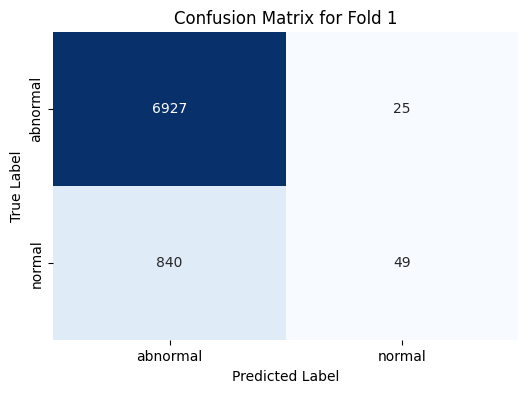

Fold 2
Fold 2 | Epoch 1/5 | Training Loss: 0.3397 | Validation Accuracy: 88.93%
Fold 2 | Epoch 2/5 | Training Loss: 0.3126 | Validation Accuracy: 88.82%
Fold 2 | Epoch 3/5 | Training Loss: 0.3028 | Validation Accuracy: 89.01%
Fold 2 | Epoch 4/5 | Training Loss: 0.2950 | Validation Accuracy: 88.66%
Fold 2 | Epoch 5/5 | Training Loss: 0.2915 | Validation Accuracy: 89.01%
Accuracy for fold 2: 89.01%
F1 Score for fold 2: 0.8383
              precision    recall  f1-score   support

    abnormal       0.89      1.00      0.94      6979
      normal       1.00      0.00      0.00       862

    accuracy                           0.89      7841
   macro avg       0.95      0.50      0.47      7841
weighted avg       0.90      0.89      0.84      7841



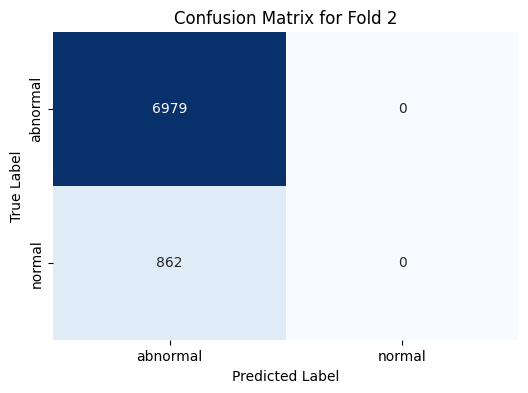

Fold 3
Fold 3 | Epoch 1/5 | Training Loss: 0.3411 | Validation Accuracy: 89.35%
Fold 3 | Epoch 2/5 | Training Loss: 0.3108 | Validation Accuracy: 89.31%
Fold 3 | Epoch 3/5 | Training Loss: 0.3020 | Validation Accuracy: 89.02%
Fold 3 | Epoch 4/5 | Training Loss: 0.2973 | Validation Accuracy: 89.55%
Fold 3 | Epoch 5/5 | Training Loss: 0.2916 | Validation Accuracy: 89.82%
Accuracy for fold 3: 89.82%
F1 Score for fold 3: 0.8798
              precision    recall  f1-score   support

    abnormal       0.92      0.98      0.94      7006
      normal       0.55      0.24      0.33       835

    accuracy                           0.90      7841
   macro avg       0.73      0.61      0.64      7841
weighted avg       0.88      0.90      0.88      7841



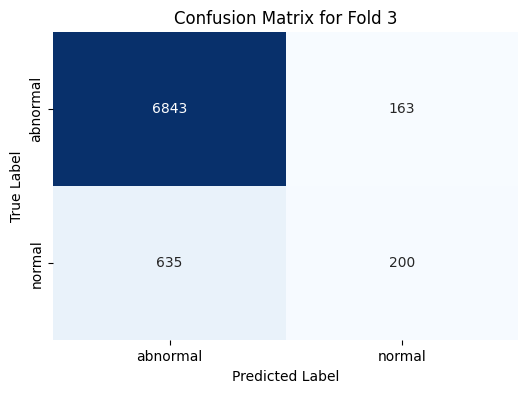

Fold 4
Fold 4 | Epoch 1/5 | Training Loss: 0.3391 | Validation Accuracy: 88.80%
Fold 4 | Epoch 2/5 | Training Loss: 0.3150 | Validation Accuracy: 88.93%
Fold 4 | Epoch 3/5 | Training Loss: 0.2995 | Validation Accuracy: 88.97%
Fold 4 | Epoch 4/5 | Training Loss: 0.2982 | Validation Accuracy: 88.80%
Fold 4 | Epoch 5/5 | Training Loss: 0.2912 | Validation Accuracy: 89.02%
Accuracy for fold 4: 89.02%
F1 Score for fold 4: 0.8433
              precision    recall  f1-score   support

    abnormal       0.89      1.00      0.94      6962
      normal       0.71      0.03      0.06       878

    accuracy                           0.89      7840
   macro avg       0.80      0.52      0.50      7840
weighted avg       0.87      0.89      0.84      7840



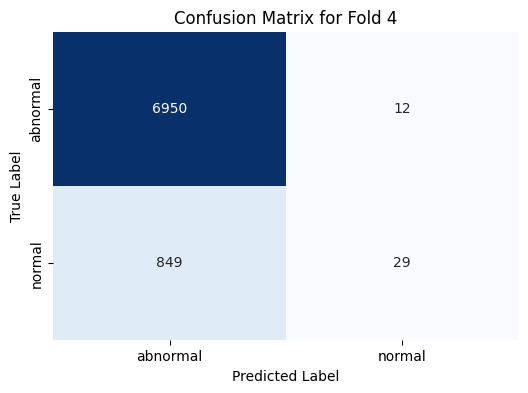

Fold 5
Fold 5 | Epoch 1/5 | Training Loss: 0.3435 | Validation Accuracy: 89.39%
Fold 5 | Epoch 2/5 | Training Loss: 0.3145 | Validation Accuracy: 89.78%
Fold 5 | Epoch 3/5 | Training Loss: 0.3047 | Validation Accuracy: 89.41%
Fold 5 | Epoch 4/5 | Training Loss: 0.2963 | Validation Accuracy: 89.73%
Fold 5 | Epoch 5/5 | Training Loss: 0.2910 | Validation Accuracy: 89.74%
Accuracy for fold 5: 89.74%
F1 Score for fold 5: 0.8739
              precision    recall  f1-score   support

    abnormal       0.91      0.98      0.94      7014
      normal       0.54      0.18      0.27       826

    accuracy                           0.90      7840
   macro avg       0.73      0.58      0.61      7840
weighted avg       0.87      0.90      0.87      7840



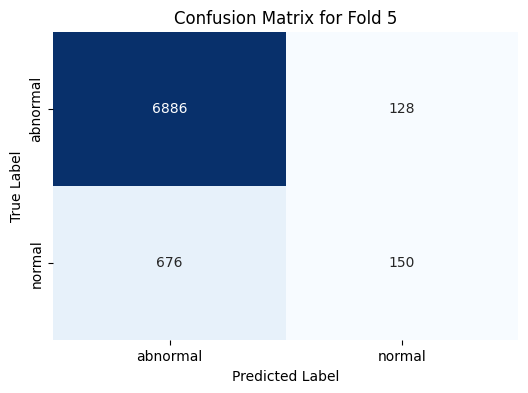

Average Accuracy: 89.31%
Average F1 Score: 0.8563


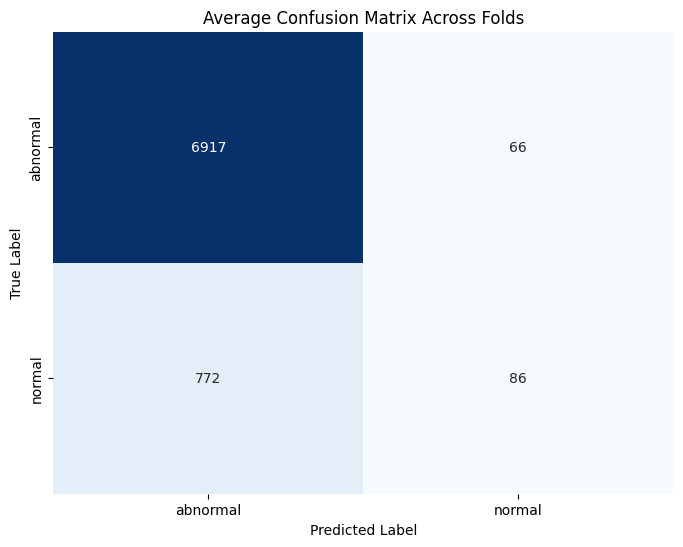

Hasil Deteksi Pola Enkripsi Ransomware:
Fold 1: Akurasi = 88.97%, F1 Score = 0.8461
Fold 2: Akurasi = 89.01%, F1 Score = 0.8383
Fold 3: Akurasi = 89.82%, F1 Score = 0.8798
Fold 4: Akurasi = 89.02%, F1 Score = 0.8433
Fold 5: Akurasi = 89.74%, F1 Score = 0.8739


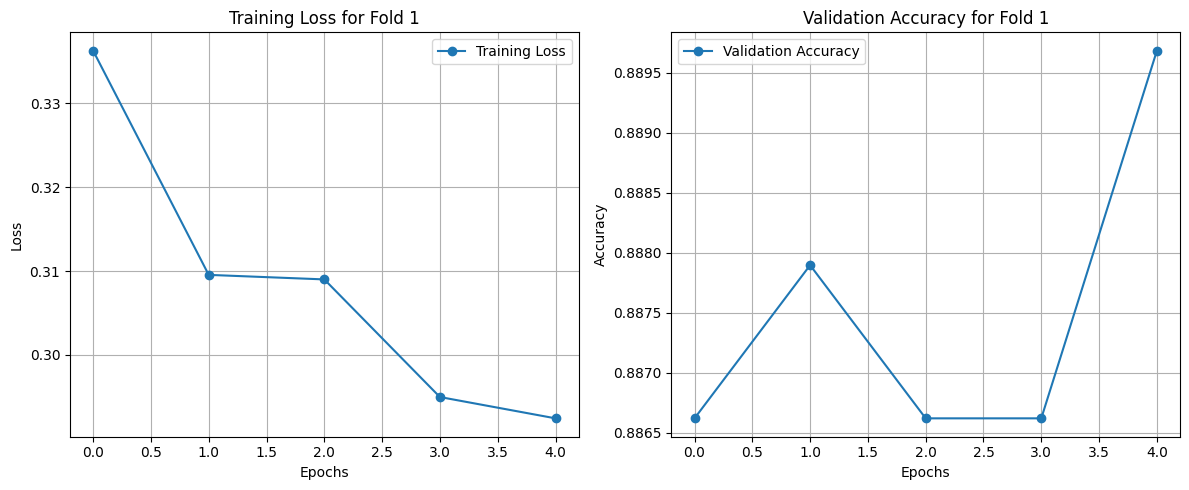

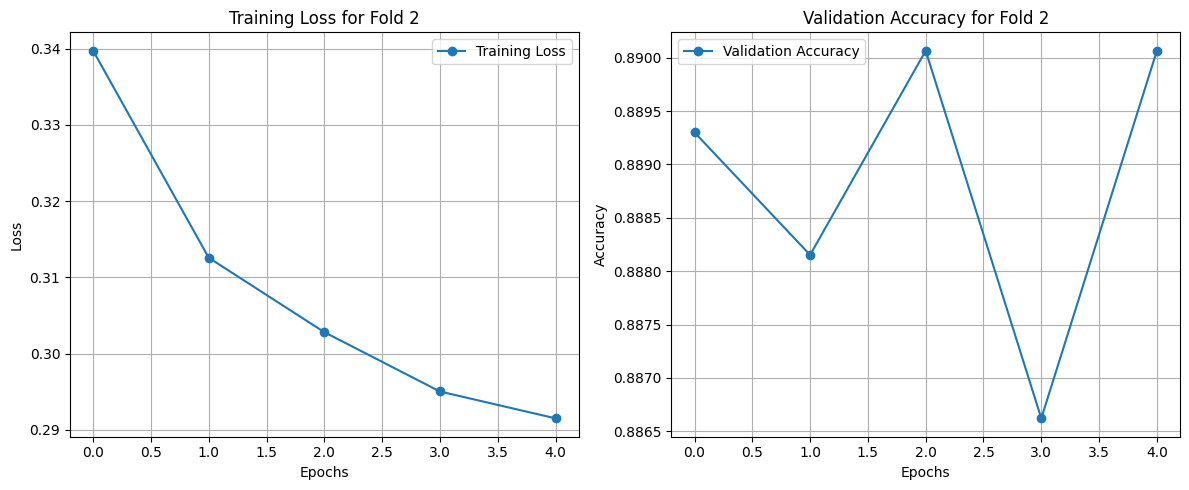

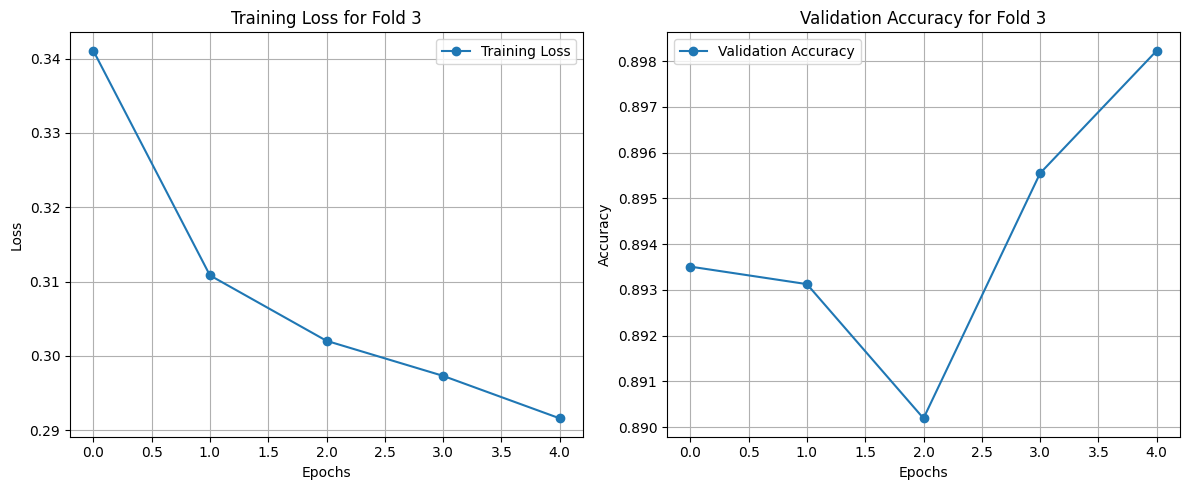

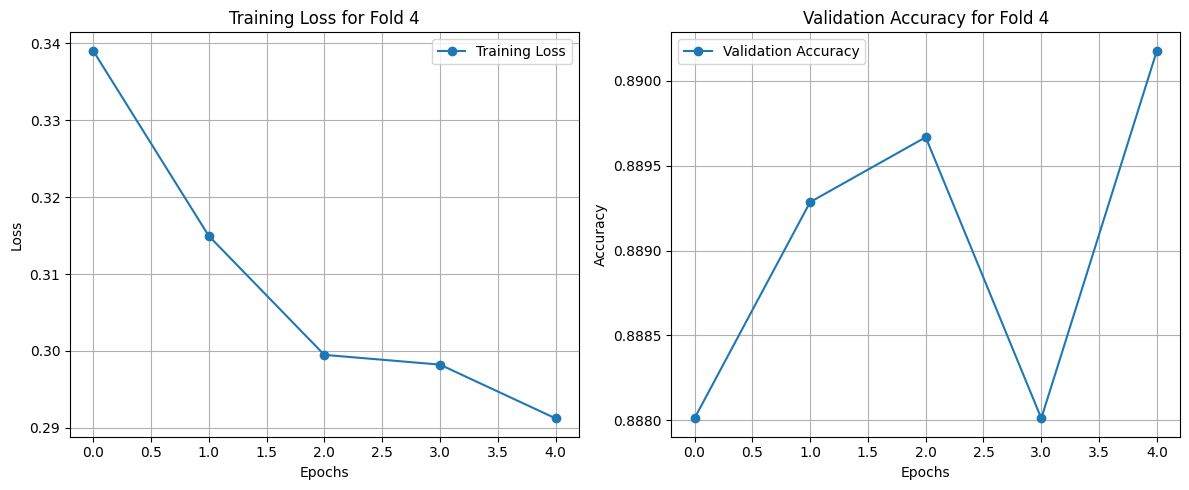

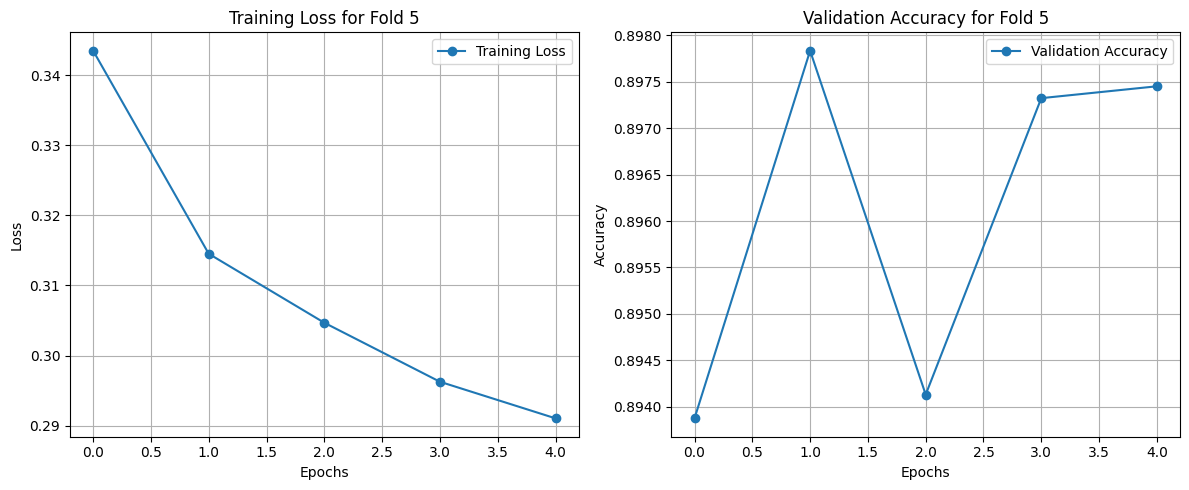

In [92]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score
from sklearn.preprocessing import LabelEncoder
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Preprocessing: Label Encoding
# data = pd.read_csv('/content/gdrive/MyDrive/ASDOS/template/Topik1_Studi Transformer-Based Sequence Modelling untuk Deteksi Ransomware Melalui Analisis Trafik Jaringan yang Mengenkripsi Secara Tiba-tiba/dataset/UNSW_NB15_training-set.csv')

# Ganti label menjadi dua kategori 'normal' dan 'abnormal'
# bin_label = pd.DataFrame(data.label.map(lambda x: 'normal' if x == 0 else 'abnormal'))
# bin_data = data.copy()
# bin_data['label'] = bin_label

# # Label encoding (0,1) untuk label biner
# le1 = LabelEncoder()
# enc_label = bin_label.apply(le1.fit_transform)
# bin_data['label'] = enc_label

# 2. Cek dan isi nilai hilang
bin_data.fillna(0, inplace=True)

# 3. Membagi dataset
X_bin = bin_data.drop(columns=['Label'], axis=1)
y_bin = bin_data['Label']
X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(X_bin, y_bin, test_size=0.2, random_state=50)

# 4. Define GPT Model
class GPTModel(nn.Module):
    def __init__(self, input_dim, num_classes, d_model=64, nhead=2, num_layers=2):
        super(GPTModel, self).__init__()
        self.embedding = nn.Linear(input_dim, d_model)  # Embedding layer
        self.transformer_decoder = nn.TransformerDecoder(
            nn.TransformerDecoderLayer(d_model=d_model, nhead=nhead, batch_first=True),
            num_layers=num_layers
        )
        self.fc = nn.Linear(d_model, num_classes)  # Output layer

    def forward(self, x):
        x = self.embedding(x)  # Embed the input features
        x = x.unsqueeze(1)  # Add sequence dimension (batch_size, seq_length, feature_dim)

        # Initialize the decoder input with zeros (masking for causal attention)
        decoder_input = torch.zeros_like(x)

        # Pass through the transformer decoder
        x = self.transformer_decoder(decoder_input, x)  # Note the order: decoder input, encoder output
        x = x.mean(dim=1)  # Average pooling
        return self.fc(x)  # Final output

# 5. KFold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=50)
all_accuracy, all_f1_scores = [], []
conf_matrix_list = []
average_train_losses = []  # List to store average train losses for plotting
average_val_accuracies = []  # List to store validation accuracies for plotting

for fold, (train_index, val_index) in enumerate(kf.split(bin_data)):
    print(f'Fold {fold + 1}')

    # Split data using .iloc to select rows by index
    X_train, X_val = bin_data.drop(columns=['Label']).iloc[train_index], bin_data.drop(columns=['Label']).iloc[val_index]
    y_train, y_val = bin_data['Label'].iloc[train_index], bin_data['Label'].iloc[val_index]

    # Convert to PyTorch tensors (hanya ambil kolom numerik)
    X_train_tensor = torch.FloatTensor(X_train.select_dtypes(include=np.number).values)
    y_train_tensor = torch.LongTensor(y_train.values)
    X_val_tensor = torch.FloatTensor(X_val.select_dtypes(include=np.number).values)
    y_val_tensor = torch.LongTensor(y_val.values)

    # Create DataLoader
    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

    # Initialize the model
    model = GPTModel(input_dim=X_train_tensor.shape[1], num_classes=len(le1.classes_))
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

    # Early stopping setup
    best_accuracy = 0
    patience, trigger_times = 5, 0

    # Train the model
    num_epochs = 5  # Meningkatkan jumlah epoch
    train_losses = []  # List untuk menyimpan loss per epoch
    val_accuracies = []  # List untuk menyimpan akurasi per epoch

    # Training loop with added print statements for each epoch
    for epoch in range(num_epochs):
        model.train()
        epoch_loss = 0
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()

        avg_loss = epoch_loss / len(train_loader)
        train_losses.append(avg_loss)

        # Validate the model
        model.eval()
        with torch.no_grad():
            y_pred_probs = model(X_val_tensor)
            _, y_pred = torch.max(y_pred_probs, 1)

        accuracy = accuracy_score(y_val, y_pred.numpy())
        val_accuracies.append(accuracy)

        # Print epoch-level results
        print(f'Fold {fold + 1} | Epoch {epoch + 1}/{num_epochs} | '
              f'Training Loss: {avg_loss:.4f} | Validation Accuracy: {accuracy * 100:.2f}%')

        # Save the best model
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            torch.save(model.state_dict(), f'model_best_fold_{fold + 1}.pt')
            trigger_times = 0
        else:
            trigger_times += 1

        if trigger_times >= patience:
            print(f'Early stopping triggered at epoch {epoch + 1}')
            break


    # Metrics calculation
    conf_matrix = confusion_matrix(y_val, y_pred.numpy())
    conf_matrix_list.append(conf_matrix)
    all_accuracy.append(accuracy)

    f1 = f1_score(y_val, y_pred.numpy(), average='weighted')
    all_f1_scores.append(f1)

    # Print results for the current fold
    print(f'Accuracy for fold {fold + 1}: {accuracy * 100:.2f}%')
    print(f'F1 Score for fold {fold + 1}: {f1:.4f}')


    # Calculate F1 score with `zero_division` parameter
    f1 = f1_score(y_val, y_pred.numpy(), average='weighted', zero_division=1)  # Set zero_division to 1 to avoid warnings

    # Generate classification report with zero_division option
    cls_report = classification_report(y_val, y_pred.numpy(), target_names=le1.classes_, zero_division=1, labels=range(len(le1.classes_)))
    print(cls_report)

    # # Fix: Specify labels explicitly in classification_report
    # # Assuming y_pred.numpy() contains predictions for all 11 classes:
    # cls_report = classification_report(y_val, y_pred.numpy(), target_names=le1.classes_, labels=range(len(le1.classes_)))
    # print(cls_report)

    # Store average loss and accuracy for plotting
    average_train_losses.append(train_losses)
    average_val_accuracies.append(val_accuracies)

    # Plot confusion matrix for the current fold
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='.0f', cmap='Blues', cbar=False,
                xticklabels=le1.classes_, yticklabels=le1.classes_)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix for Fold {fold + 1}')
    plt.show()

# 6. Average Metrics Across All Folds
print(f'Average Accuracy: {np.mean(all_accuracy) * 100:.2f}%')
print(f'Average F1 Score: {np.mean(all_f1_scores):.4f}')

# 7. Plot the Average Confusion Matrix
average_conf_matrix = np.mean(conf_matrix_list, axis=0)

plt.figure(figsize=(8, 6))
sns.heatmap(average_conf_matrix, annot=True, fmt='.0f', cmap='Blues', cbar=False,
            xticklabels=le1.classes_, yticklabels=le1.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Average Confusion Matrix Across Folds')
plt.show()

# 8. Analysis of Results
print("Hasil Deteksi Pola Enkripsi Ransomware:")
for i, (acc, f1) in enumerate(zip(all_accuracy, all_f1_scores)):
    print(f'Fold {i + 1}: Akurasi = {acc * 100:.2f}%, F1 Score = {f1:.4f}')

# 9. Plot Loss and Accuracy for Each Fold
for fold in range(len(average_train_losses)):
    plt.figure(figsize=(12, 5))

    # Grafik Loss
    plt.subplot(1, 2, 1)
    plt.plot(average_train_losses[fold], label='Training Loss', marker='o')
    plt.title(f'Training Loss for Fold {fold + 1}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid()

    # Grafik Akurasi
    plt.subplot(1, 2, 2)
    plt.plot(average_val_accuracies[fold], label='Validation Accuracy', marker='o')
    plt.title(f'Validation Accuracy for Fold {fold + 1}')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid()

    plt.tight_layout()
    plt.show()


# **Hyperparameter Tuning**

In [ ]:
import optuna
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score
from sklearn.preprocessing import LabelEncoder
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset

# # Preprocessing data
# data = pd.read_csv('/content/gdrive/MyDrive/ASDOS/template/Topik1_Studi Transformer-Based Sequence Modelling untuk Deteksi Ransomware Melalui Analisis Trafik Jaringan yang Mengenkripsi Secara Tiba-tiba/dataset/UNSW_NB15_training-set.csv')

# # Ganti label menjadi dua kategori 'normal' dan 'abnormal'
# bin_label = pd.DataFrame(data.label.map(lambda x: 'normal' if x == 0 else 'abnormal'))
# bin_data = data.copy()
# bin_data['label'] = bin_label

# # Label encoding (0,1) untuk label biner
# le1 = LabelEncoder()
# enc_label = bin_label.apply(le1.fit_transform)
# bin_data['label'] = enc_label

# Cek dan isi nilai hilang
bin_data.fillna(0, inplace=True)

# Memisahkan dataset
X_bin = bin_data.drop(columns=['Label'], axis=1)
y_bin = bin_data['Label']
X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(X_bin, y_bin, test_size=0.2, random_state=50)

# Define GPT Model
class GPTModel(nn.Module):
    def __init__(self, input_dim, num_classes, d_model=64, nhead=2, num_layers=2):
        super(GPTModel, self).__init__()
        self.embedding = nn.Linear(input_dim, d_model)  # Embedding layer
        self.transformer_decoder = nn.TransformerDecoder(
            nn.TransformerDecoderLayer(d_model=d_model, nhead=nhead, batch_first=True),
            num_layers=num_layers
        )
        self.fc = nn.Linear(d_model, num_classes)  # Output layer

    def forward(self, x):
        x = self.embedding(x)  # Embed the input features
        x = x.unsqueeze(1)  # Add sequence dimension (batch_size, seq_length, feature_dim)

        # Initialize the decoder input with zeros (masking for causal attention)
        decoder_input = torch.zeros_like(x)

        # Pass through the transformer decoder
        x = self.transformer_decoder(decoder_input, x)  # Note the order: decoder input, encoder output
        x = x.mean(dim=1)  # Average pooling
        return self.fc(x)  # Final output

# Hyperparameter tuning function
# Hyperparameter tuning function with print statements for monitoring
def objective(trial):
    # Define hyperparameters to be tuned
    d_model = trial.suggest_int('d_model', 32, 128)  # Dimensionality of the model
    # Ensure nhead is a divisor of d_model
     # Fix: Define nhead_options outside the loop with all possible values
    nhead_options = [1, 2, 4]  # Common divisors for the range of d_model (32-128)

    # Suggest nhead, ensuring it's a divisor of d_model
    nhead = trial.suggest_categorical('nhead', nhead_options)
    while d_model % nhead != 0:  # Resample if nhead is not a divisor
        nhead = trial.suggest_categorical('nhead', nhead_options)

    num_layers = trial.suggest_int('num_layers', 1, 4)  # Number of layers
    learning_rate = trial.suggest_loguniform('lr', 1e-5, 1e-1)  # Learning rate

    # Display current trial's parameters
    print(f"\nStarting trial with parameters: d_model={d_model}, nhead={nhead}, num_layers={num_layers}, lr={learning_rate}")

    # Initialize the model
    model = GPTModel(input_dim=X_train_bin.shape[1], num_classes=len(le1.classes_), d_model=d_model, nhead=nhead, num_layers=num_layers)
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

    # Cross-validation
    kf = KFold(n_splits=5, shuffle=True, random_state=50)
    accuracies = []

    for fold, (train_index, val_index) in enumerate(kf.split(X_train_bin)):
        X_train, X_val = X_train_bin.iloc[train_index], X_train_bin.iloc[val_index]
        y_train, y_val = y_train_bin.iloc[train_index], y_train_bin.iloc[val_index]

        # Convert to PyTorch tensors
        X_train_tensor = torch.FloatTensor(X_train.select_dtypes(include=np.number).values)
        y_train_tensor = torch.LongTensor(y_train.values)
        X_val_tensor = torch.FloatTensor(X_val.select_dtypes(include=np.number).values)
        y_val_tensor = torch.LongTensor(y_val.values)

        # Create DataLoader
        train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
        train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

        # Initialize the model INSIDE the loop with the correct input dimension
        model = GPTModel(input_dim=X_train_tensor.shape[1], num_classes=len(le1.classes_),
                         d_model=d_model, nhead=nhead, num_layers=num_layers)
        criterion = nn.CrossEntropyLoss()
        optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

        # Train the model
        num_epochs = 5
        for epoch in range(num_epochs):
            model.train()
            for inputs, labels in train_loader:
                optimizer.zero_grad()
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()

        # Validate the model
        model.eval()
        with torch.no_grad():
            y_pred_probs = model(X_val_tensor)
            _, y_pred = torch.max(y_pred_probs, 1)
            accuracy = accuracy_score(y_val, y_pred.numpy())
            accuracies.append(accuracy)

        # Print accuracy for the current fold
        print(f"Fold {fold + 1} - Accuracy: {accuracy:.4f}")

    mean_accuracy = np.mean(accuracies)
    print(f"Trial completed with mean accuracy: {mean_accuracy:.4f}\n")

    return mean_accuracy  # Return the mean accuracy across all folds

# Run Optuna with monitoring
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=10)  # Adjust the number of trials as needed

# Print the best hyperparameters
print('Best hyperparameters:', study.best_params)
print('Best accuracy:', study.best_value)


[I 2024-10-30 06:48:19,810] A new study created in memory with name: no-name-46d2ab28-94f8-45d4-960d-301c6ae4a548
<ipython-input-95-fc00635af9d0>:70: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('lr', 1e-5, 1e-1)  # Learning rate



Starting trial with parameters: d_model=56, nhead=4, num_layers=4, lr=9.795913358321791e-05
Fold 1 - Accuracy: 0.8951
Fold 2 - Accuracy: 0.8914
Fold 3 - Accuracy: 0.8940
Fold 4 - Accuracy: 0.8992


[I 2024-10-30 07:09:40,811] Trial 0 finished with value: 0.8953511943395245 and parameters: {'d_model': 56, 'nhead': 4, 'num_layers': 4, 'lr': 9.795913358321791e-05}. Best is trial 0 with value: 0.8953511943395245.


Fold 5 - Accuracy: 0.8970
Trial completed with mean accuracy: 0.8954


Starting trial with parameters: d_model=70, nhead=2, num_layers=2, lr=0.005398409915310075


<ipython-input-95-fc00635af9d0>:70: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('lr', 1e-5, 1e-1)  # Learning rate


Fold 1 - Accuracy: 0.8922
Fold 2 - Accuracy: 0.8875
Fold 3 - Accuracy: 0.8906
Fold 4 - Accuracy: 0.8959


[I 2024-10-30 07:22:13,237] Trial 1 finished with value: 0.89155677006575 and parameters: {'d_model': 70, 'nhead': 2, 'num_layers': 2, 'lr': 0.005398409915310075}. Best is trial 0 with value: 0.8953511943395245.


Fold 5 - Accuracy: 0.8916
Trial completed with mean accuracy: 0.8916


Starting trial with parameters: d_model=121, nhead=1, num_layers=4, lr=0.004628153088474517


<ipython-input-95-fc00635af9d0>:70: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('lr', 1e-5, 1e-1)  # Learning rate


Fold 1 - Accuracy: 0.8922
Fold 2 - Accuracy: 0.8875
Fold 3 - Accuracy: 0.8835
Fold 4 - Accuracy: 0.8940


[I 2024-10-30 08:04:02,443] Trial 2 finished with value: 0.8897072802698315 and parameters: {'d_model': 121, 'nhead': 1, 'num_layers': 4, 'lr': 0.004628153088474517}. Best is trial 0 with value: 0.8953511943395245.


Fold 5 - Accuracy: 0.8914
Trial completed with mean accuracy: 0.8897


Starting trial with parameters: d_model=100, nhead=4, num_layers=4, lr=0.00016340931724044365


<ipython-input-95-fc00635af9d0>:70: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('lr', 1e-5, 1e-1)  # Learning rate


Fold 1 - Accuracy: 0.8953
Fold 2 - Accuracy: 0.8897
Fold 3 - Accuracy: 0.8911
Fold 4 - Accuracy: 0.8973


[I 2024-10-30 08:31:11,446] Trial 3 finished with value: 0.8941713982340904 and parameters: {'d_model': 100, 'nhead': 4, 'num_layers': 4, 'lr': 0.00016340931724044365}. Best is trial 0 with value: 0.8953511943395245.


Fold 5 - Accuracy: 0.8975
Trial completed with mean accuracy: 0.8942


Starting trial with parameters: d_model=102, nhead=2, num_layers=3, lr=0.002189814469611176


<ipython-input-95-fc00635af9d0>:70: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('lr', 1e-5, 1e-1)  # Learning rate


Fold 1 - Accuracy: 0.8922
Fold 2 - Accuracy: 0.8906
Fold 3 - Accuracy: 0.8906
Fold 4 - Accuracy: 0.8959


[I 2024-10-30 08:51:53,527] Trial 4 finished with value: 0.8921944235011077 and parameters: {'d_model': 102, 'nhead': 2, 'num_layers': 3, 'lr': 0.002189814469611176}. Best is trial 0 with value: 0.8953511943395245.


Fold 5 - Accuracy: 0.8916
Trial completed with mean accuracy: 0.8922



# **CLASSIFICATION With Hyperparameter Tuning**
(ganti parameter sesuai yang terbaik hasil hyperparameter tuning ya)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score
from sklearn.preprocessing import LabelEncoder
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Preprocessing: Label Encoding
data = pd.read_csv('/content/gdrive/MyDrive/ASDOS/template/Topik1_Studi Transformer-Based Sequence Modelling untuk Deteksi Ransomware Melalui Analisis Trafik Jaringan yang Mengenkripsi Secara Tiba-tiba/dataset/UNSW_NB15_training-set.csv')

# Ganti label menjadi dua kategori 'normal' dan 'abnormal'
bin_label = pd.DataFrame(data.label.map(lambda x: 'normal' if x == 0 else 'abnormal'))
bin_data = data.copy()
bin_data['label'] = bin_label

# Label encoding (0,1) untuk label biner
le1 = LabelEncoder()
enc_label = bin_label.apply(le1.fit_transform)
bin_data['label'] = enc_label

# 2. Cek dan isi nilai hilang
bin_data.fillna(0, inplace=True)

# 3. Membagi dataset
X_bin = bin_data.drop(columns=['label'], axis=1)
y_bin = bin_data['label']
X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(X_bin, y_bin, test_size=0.2, random_state=50)

# 4. Define GPT Model
class GPTModel(nn.Module):
    def __init__(self, input_dim, num_classes, d_model=64, nhead=2, num_layers=2):
        super(GPTModel, self).__init__()
        self.embedding = nn.Linear(input_dim, d_model)  # Embedding layer
        self.transformer_decoder = nn.TransformerDecoder(
            nn.TransformerDecoderLayer(d_model=d_model, nhead=nhead, batch_first=True),
            num_layers=num_layers
        )
        self.fc = nn.Linear(d_model, num_classes)  # Output layer

    def forward(self, x):
        x = self.embedding(x)  # Embed the input features
        x = x.unsqueeze(1)  # Add sequence dimension (batch_size, seq_length, feature_dim)

        # Initialize the decoder input with zeros (masking for causal attention)
        decoder_input = torch.zeros_like(x)

        # Pass through the transformer decoder
        x = self.transformer_decoder(decoder_input, x)  # Note the order: decoder input, encoder output
        x = x.mean(dim=1)  # Average pooling
        return self.fc(x)  # Final output

# 5. KFold Cross-Validation
kf = KFold(n_splits=10, shuffle=True, random_state=50)
all_accuracy, all_f1_scores = [], []
conf_matrix_list = []
average_train_losses = []  # List to store average train losses for plotting
average_val_accuracies = []  # List to store validation accuracies for plotting

for fold, (train_index, val_index) in enumerate(kf.split(bin_data)):
    print(f'Fold {fold + 1}')

    # Split data using .iloc to select rows by index
    X_train, X_val = bin_data.drop(columns=['label']).iloc[train_index], bin_data.drop(columns=['label']).iloc[val_index]
    y_train, y_val = bin_data['label'].iloc[train_index], bin_data['label'].iloc[val_index]

    # Convert to PyTorch tensors (hanya ambil kolom numerik)
    X_train_tensor = torch.FloatTensor(X_train.select_dtypes(include=np.number).values)
    y_train_tensor = torch.LongTensor(y_train.values)
    X_val_tensor = torch.FloatTensor(X_val.select_dtypes(include=np.number).values)
    y_val_tensor = torch.LongTensor(y_val.values)

    # Create DataLoader
    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

    # Initialize the model
    model = GPTModel(input_dim=X_train_tensor.shape[1], num_classes=len(le1.classes_))
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

    # Early stopping setup
    best_accuracy = 0
    patience, trigger_times = 5, 0

    # Train the model
    num_epochs = 20  # Meningkatkan jumlah epoch
    train_losses = []  # List untuk menyimpan loss per epoch
    val_accuracies = []  # List untuk menyimpan akurasi per epoch

    for epoch in range(num_epochs):
        model.train()
        epoch_loss = 0
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()

        avg_loss = epoch_loss / len(train_loader)
        train_losses.append(avg_loss)

        # Validate the model
        model.eval()
        with torch.no_grad():
            y_pred_probs = model(X_val_tensor)
            _, y_pred = torch.max(y_pred_probs, 1)

        accuracy = accuracy_score(y_val, y_pred.numpy())
        val_accuracies.append(accuracy)

        # Save the best model
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            torch.save(model.state_dict(), f'model_best_fold_{fold + 1}.pt')
            trigger_times = 0
        else:
            trigger_times += 1

        if trigger_times >= patience:
            print(f'Early stopping triggered at epoch {epoch + 1}')
            break

    # Metrics calculation
    conf_matrix = confusion_matrix(y_val, y_pred.numpy())
    conf_matrix_list.append(conf_matrix)
    all_accuracy.append(accuracy)

    f1 = f1_score(y_val, y_pred.numpy(), average='weighted')
    all_f1_scores.append(f1)

    # Print results for the current fold
    print(f'Accuracy for fold {fold + 1}: {accuracy * 100:.2f}%')
    print(f'F1 Score for fold {fold + 1}: {f1:.4f}')
    cls_report = classification_report(y_val, y_pred.numpy(), target_names=le1.classes_)
    print(cls_report)

    # Store average loss and accuracy for plotting
    average_train_losses.append(train_losses)
    average_val_accuracies.append(val_accuracies)

    # Plot confusion matrix for the current fold
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='.0f', cmap='Blues', cbar=False,
                xticklabels=le1.classes_, yticklabels=le1.classes_)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix for Fold {fold + 1}')
    plt.show()

# 6. Average Metrics Across All Folds
print(f'Average Accuracy: {np.mean(all_accuracy) * 100:.2f}%')
print(f'Average F1 Score: {np.mean(all_f1_scores):.4f}')

# 7. Plot the Average Confusion Matrix
average_conf_matrix = np.mean(conf_matrix_list, axis=0)

plt.figure(figsize=(8, 6))
sns.heatmap(average_conf_matrix, annot=True, fmt='.0f', cmap='Blues', cbar=False,
            xticklabels=le1.classes_, yticklabels=le1.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Average Confusion Matrix Across Folds')
plt.show()

# 8. Analysis of Results
print("Hasil Deteksi Pola Enkripsi Ransomware:")
for i, (acc, f1) in enumerate(zip(all_accuracy, all_f1_scores)):
    print(f'Fold {i + 1}: Akurasi = {acc * 100:.2f}%, F1 Score = {f1:.4f}')

# 9. Plot Loss and Accuracy for Each Fold
for fold in range(len(average_train_losses)):
    plt.figure(figsize=(12, 5))

    # Grafik Loss
    plt.subplot(1, 2, 1)
    plt.plot(average_train_losses[fold], label='Training Loss', marker='o')
    plt.title(f'Training Loss for Fold {fold + 1}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid()

    # Grafik Akurasi
    plt.subplot(1, 2, 2)
    plt.plot(average_val_accuracies[fold], label='Validation Accuracy', marker='o')
    plt.title(f'Validation Accuracy for Fold {fold + 1}')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid()

    plt.tight_layout()
    plt.show()


# **4. TRANSFORMER "RoBERTa"**

# **CLASSIFICATION Non-Tuning**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score
from sklearn.preprocessing import LabelEncoder
import torch
from transformers import RobertaTokenizer, RobertaForSequenceClassification
from torch.utils.data import DataLoader, Dataset
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Preprocessing: Label Encoding
class_names = le1.classes_  # Save the original class names

# Cek apakah ada nilai hilang dan ganti dengan nilai yang sesuai
bin_data.fillna(0, inplace=True)  # Mengisi nilai hilang dengan 0

# Tokenizer untuk RoBERTa
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')

# Kelas Dataset untuk RoBERTa
class RansomwareDataset(Dataset):
    def __init__(self, texts, labels):
        self.texts = texts
        self.labels = labels

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = str(self.texts[idx])  # Pastikan teks adalah string
        label = self.labels[idx]
        # Tokenisasi dan encoding input
        encoding = tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=512,
            padding='max_length',
            return_token_type_ids=False,
            return_attention_mask=True,
            return_tensors='pt',
            truncation=True
        )
        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }

# 2. KFold Cross-Validation
kf = KFold(n_splits=10, shuffle=True, random_state=50)
all_accuracy, all_f1_scores = [], []
conf_matrix_list = []
average_train_losses = []
average_val_accuracies = []

for fold, (train_index, val_index) in enumerate(kf.split(bin_data)):
    print(f'Fold {fold + 1}')

    # Split data using .iloc to select rows by index
    X_train, X_val = bin_data.drop(columns=['label']).iloc[train_index], bin_data.drop(columns=['label']).iloc[val_index]
    y_train, y_val = bin_data['label'].iloc[train_index], bin_data['label'].iloc[val_index]

    # Create custom datasets
    train_dataset = RansomwareDataset(X_train.astype(str).values, y_train.values)
    val_dataset = RansomwareDataset(X_val.astype(str).values, y_val.values)

    # Create DataLoader
    train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)

    # Initialize the model
    model = RobertaForSequenceClassification.from_pretrained('roberta-base', num_labels=len(class_names))
    optimizer = torch.optim.AdamW(model.parameters(), lr=1e-5)

    # Early stopping setup
    best_accuracy = 0
    patience, trigger_times = 5, 0

    # Train the model
    num_epochs = 20
    train_losses = []
    val_accuracies = []

    for epoch in range(num_epochs):
        model.train()
        epoch_loss = 0
        for batch in train_loader:
            optimizer.zero_grad()
            input_ids = batch['input_ids']
            attention_mask = batch['attention_mask']
            labels = batch['labels']
            outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()

        avg_loss = epoch_loss / len(train_loader)
        train_losses.append(avg_loss)

        # Validate the model
        model.eval()
        y_val_preds = []
        with torch.no_grad():
            for batch in val_loader:
                input_ids = batch['input_ids']
                attention_mask = batch['attention_mask']
                outputs = model(input_ids=input_ids, attention_mask=attention_mask)
                y_val_preds.extend(torch.argmax(outputs.logits, dim=1).cpu().numpy())

        accuracy = accuracy_score(y_val, y_val_preds)
        val_accuracies.append(accuracy)

        # Save the best model
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            torch.save(model.state_dict(), f'model_best_fold_{fold + 1}.pt')
            trigger_times = 0
        else:
            trigger_times += 1

        if trigger_times >= patience:
            print(f'Early stopping triggered at epoch {epoch + 1}')
            break

    # Metrics calculation
    conf_matrix = confusion_matrix(y_val, y_val_preds)
    conf_matrix_list.append(conf_matrix)
    all_accuracy.append(accuracy)

    f1 = f1_score(y_val, y_val_preds, average='weighted')
    all_f1_scores.append(f1)

    # Print results for the current fold
    print(f'Accuracy for fold {fold + 1}: {accuracy * 100:.2f}%')
    print(f'F1 Score for fold {fold + 1}: {f1:.4f}')
    cls_report = classification_report(y_val, y_val_preds, target_names=class_names)
    print(cls_report)

    # Store average loss and accuracy for plotting
    average_train_losses.append(train_losses)
    average_val_accuracies.append(val_accuracies)

    # Plot confusion matrix for the current fold
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='.0f', cmap='Blues', cbar=False,
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix for Fold {fold + 1}')
    plt.show()

# 4. Average Metrics Across All Folds
print(f'Average Accuracy: {np.mean(all_accuracy) * 100:.2f}%')
print(f'Average F1 Score: {np.mean(all_f1_scores):.4f}')

# 5. Plot the Average Confusion Matrix
average_conf_matrix = np.mean(conf_matrix_list, axis=0)

plt.figure(figsize=(8, 6))
sns.heatmap(average_conf_matrix, annot=True, fmt='.0f', cmap='Blues', cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Average Confusion Matrix Across Folds')
plt.show()

# 6. Analysis of Results
print("Hasil Deteksi Pola Enkripsi Ransomware:")
for i, (acc, f1) in enumerate(zip(all_accuracy, all_f1_scores)):
    print(f'Fold {i + 1}: Akurasi = {acc * 100:.2f}%, F1 Score = {f1:.4f}')

# 7. Plot Loss and Accuracy for Each Fold
for fold in range(len(average_train_losses)):
    plt.figure(figsize=(12, 5))

    # Grafik Loss
    plt.subplot(1, 2, 1)
    plt.plot(average_train_losses[fold], label='Training Loss', marker='o')
    plt.title(f'Training Loss for Fold {fold + 1}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid()

    # Grafik Akurasi
    plt.subplot(1, 2, 2)
    plt.plot(average_val_accuracies[fold], label='Validation Accuracy', marker='o')
    plt.title(f'Validation Accuracy for Fold {fold + 1}')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid()

    plt.tight_layout()
    plt.show()


# **Hyperparameter Tuning**

In [ ]:
import pandas as pd
import numpy as np
import torch
from transformers import RobertaTokenizer, RobertaForSequenceClassification
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, classification_report
from torch.utils.data import DataLoader, Dataset

# Tokenizer
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')

# Kelas Dataset untuk RoBERTa
class RansomwareDataset(Dataset):
    def __init__(self, texts, labels):
        self.texts = texts
        self.labels = labels

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = str(self.texts[idx])  # Pastikan teks adalah string
        label = self.labels[idx]
        encoding = tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=512,
            padding='max_length',
            return_attention_mask=True,
            return_tensors='pt',
            truncation=True
        )
        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }

# Fungsi untuk melatih dan mengevaluasi model
def train_and_evaluate(learning_rate, batch_size, num_epochs):
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    accuracy_scores = []

    for train_index, val_index in kf.split(bin_data):
        X_train, X_val = bin_data.drop(columns=['label']).iloc[train_index], bin_data.drop(columns=['label']).iloc[val_index]
        y_train, y_val = bin_data['label'].iloc[train_index], bin_data['label'].iloc[val_index]

        train_dataset = RansomwareDataset(X_train.astype(str).values, y_train.values)
        val_dataset = RansomwareDataset(X_val.astype(str).values, y_val.values)

        train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
        val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

        model = RobertaForSequenceClassification.from_pretrained('roberta-base', num_labels=len(np.unique(y_train)))
        optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)

        # Train the model
        for epoch in range(num_epochs):
            model.train()
            for batch in train_loader:
                optimizer.zero_grad()
                input_ids = batch['input_ids']
                attention_mask = batch['attention_mask']
                labels = batch['labels']
                outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
                loss = outputs.loss
                loss.backward()
                optimizer.step()

        # Validate the model
        model.eval()
        y_val_preds = []
        with torch.no_grad():
            for batch in val_loader:
                input_ids = batch['input_ids']
                attention_mask = batch['attention_mask']
                outputs = model(input_ids=input_ids, attention_mask=attention_mask)
                y_val_preds.extend(torch.argmax(outputs.logits, dim=1).cpu().numpy())

        accuracy = accuracy_score(y_val, y_val_preds)
        accuracy_scores.append(accuracy)

    return np.mean(accuracy_scores)

# Hyperparameter tuning
learning_rates = [1e-5, 5e-5, 3e-5]
batch_sizes = [8, 16]
num_epochs_list = [3, 4]

results = []
for lr in learning_rates:
    for batch_size in batch_sizes:
        for num_epochs in num_epochs_list:
            accuracy = train_and_evaluate(lr, batch_size, num_epochs)
            results.append((lr, batch_size, num_epochs, accuracy))

# Convert results to DataFrame
results_df = pd.DataFrame(results, columns=['Learning Rate', 'Batch Size', 'Num Epochs', 'Accuracy'])

# Menampilkan hasil
print(results_df.sort_values(by='Accuracy', ascending=False))


# **CLASSIFICATION With Hyperparameter Tuning**
(ganti parameter sesuai yang terbaik hasil hyperparameter tuning ya)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score
from sklearn.preprocessing import LabelEncoder
import torch
from transformers import RobertaTokenizer, RobertaForSequenceClassification
from torch.utils.data import DataLoader, Dataset
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Preprocessing: Label Encoding
class_names = le1.classes_  # Save the original class names

# Cek apakah ada nilai hilang dan ganti dengan nilai yang sesuai
bin_data.fillna(0, inplace=True)  # Mengisi nilai hilang dengan 0

# Tokenizer untuk RoBERTa
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')

# Kelas Dataset untuk RoBERTa
class RansomwareDataset(Dataset):
    def __init__(self, texts, labels):
        self.texts = texts
        self.labels = labels

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = str(self.texts[idx])  # Pastikan teks adalah string
        label = self.labels[idx]
        # Tokenisasi dan encoding input
        encoding = tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=512,
            padding='max_length',
            return_token_type_ids=False,
            return_attention_mask=True,
            return_tensors='pt',
            truncation=True
        )
        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }

# 2. KFold Cross-Validation
kf = KFold(n_splits=10, shuffle=True, random_state=50)
all_accuracy, all_f1_scores = [], []
conf_matrix_list = []
average_train_losses = []
average_val_accuracies = []

for fold, (train_index, val_index) in enumerate(kf.split(bin_data)):
    print(f'Fold {fold + 1}')

    # Split data using .iloc to select rows by index
    X_train, X_val = bin_data.drop(columns=['label']).iloc[train_index], bin_data.drop(columns=['label']).iloc[val_index]
    y_train, y_val = bin_data['label'].iloc[train_index], bin_data['label'].iloc[val_index]

    # Create custom datasets
    train_dataset = RansomwareDataset(X_train.astype(str).values, y_train.values)
    val_dataset = RansomwareDataset(X_val.astype(str).values, y_val.values)

    # Create DataLoader
    train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)

    # Initialize the model
    model = RobertaForSequenceClassification.from_pretrained('roberta-base', num_labels=len(class_names))
    optimizer = torch.optim.AdamW(model.parameters(), lr=1e-5)

    # Early stopping setup
    best_accuracy = 0
    patience, trigger_times = 5, 0

    # Train the model
    num_epochs = 20
    train_losses = []
    val_accuracies = []

    for epoch in range(num_epochs):
        model.train()
        epoch_loss = 0
        for batch in train_loader:
            optimizer.zero_grad()
            input_ids = batch['input_ids']
            attention_mask = batch['attention_mask']
            labels = batch['labels']
            outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()

        avg_loss = epoch_loss / len(train_loader)
        train_losses.append(avg_loss)

        # Validate the model
        model.eval()
        y_val_preds = []
        with torch.no_grad():
            for batch in val_loader:
                input_ids = batch['input_ids']
                attention_mask = batch['attention_mask']
                outputs = model(input_ids=input_ids, attention_mask=attention_mask)
                y_val_preds.extend(torch.argmax(outputs.logits, dim=1).cpu().numpy())

        accuracy = accuracy_score(y_val, y_val_preds)
        val_accuracies.append(accuracy)

        # Save the best model
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            torch.save(model.state_dict(), f'model_best_fold_{fold + 1}.pt')
            trigger_times = 0
        else:
            trigger_times += 1

        if trigger_times >= patience:
            print(f'Early stopping triggered at epoch {epoch + 1}')
            break

    # Metrics calculation
    conf_matrix = confusion_matrix(y_val, y_val_preds)
    conf_matrix_list.append(conf_matrix)
    all_accuracy.append(accuracy)

    f1 = f1_score(y_val, y_val_preds, average='weighted')
    all_f1_scores.append(f1)

    # Print results for the current fold
    print(f'Accuracy for fold {fold + 1}: {accuracy * 100:.2f}%')
    print(f'F1 Score for fold {fold + 1}: {f1:.4f}')
    cls_report = classification_report(y_val, y_val_preds, target_names=class_names)
    print(cls_report)

    # Store average loss and accuracy for plotting
    average_train_losses.append(train_losses)
    average_val_accuracies.append(val_accuracies)

    # Plot confusion matrix for the current fold
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='.0f', cmap='Blues', cbar=False,
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix for Fold {fold + 1}')
    plt.show()

# 4. Average Metrics Across All Folds
print(f'Average Accuracy: {np.mean(all_accuracy) * 100:.2f}%')
print(f'Average F1 Score: {np.mean(all_f1_scores):.4f}')

# 5. Plot the Average Confusion Matrix
average_conf_matrix = np.mean(conf_matrix_list, axis=0)

plt.figure(figsize=(8, 6))
sns.heatmap(average_conf_matrix, annot=True, fmt='.0f', cmap='Blues', cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Average Confusion Matrix Across Folds')
plt.show()

# 6. Analysis of Results
print("Hasil Deteksi Pola Enkripsi Ransomware:")
for i, (acc, f1) in enumerate(zip(all_accuracy, all_f1_scores)):
    print(f'Fold {i + 1}: Akurasi = {acc * 100:.2f}%, F1 Score = {f1:.4f}')

# 7. Plot Loss and Accuracy for Each Fold
for fold in range(len(average_train_losses)):
    plt.figure(figsize=(12, 5))

    # Grafik Loss
    plt.subplot(1, 2, 1)
    plt.plot(average_train_losses[fold], label='Training Loss', marker='o')
    plt.title(f'Training Loss for Fold {fold + 1}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid()

    # Grafik Akurasi
    plt.subplot(1, 2, 2)
    plt.plot(average_val_accuracies[fold], label='Validation Accuracy', marker='o')
    plt.title(f'Validation Accuracy for Fold {fold + 1}')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid()

    plt.tight_layout()
    plt.show()
